<a href="https://colab.research.google.com/github/lferncastro/Stock-prices-prediction-using-regression-algorithms/blob/master/Stock_prices_prediction_using_regression_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1AojAnfiGOe9LqOeAwe9wg1dhSKIge8n8)

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [0]:
df=pdr.DataReader('INTC','yahoo')

In [3]:
df.shape

(2436, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2436 entries, 2010-01-04 to 2019-09-06
Data columns (total 6 columns):
High         2436 non-null float64
Low          2436 non-null float64
Open         2436 non-null float64
Close        2436 non-null float64
Volume       2436 non-null float64
Adj Close    2436 non-null float64
dtypes: float64(6)
memory usage: 133.2 KB


In [5]:
list(df)

['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

In [0]:
df.drop(['High', 'Low', 'Open', 'Close', 'Volume'],axis=1,inplace=True)

In [7]:
df.sample(10)

,Adj Close
Date,
2018-01-09,41.742085
2012-10-02,18.428648
2015-05-22,29.677292
2015-03-27,28.187012
2016-02-22,26.673712
2016-06-02,29.113281
2010-06-15,16.093273
2011-10-07,17.405451
2010-12-30,15.993000


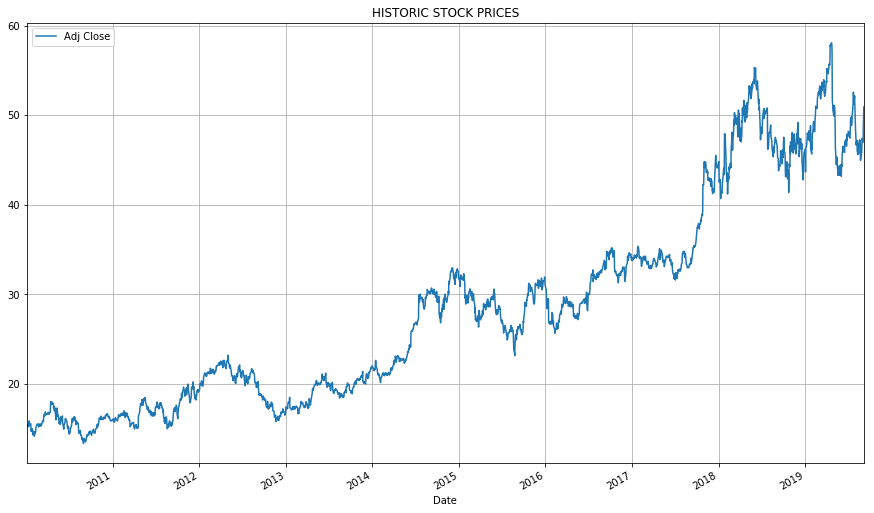

In [8]:
df.plot(grid=True,figsize=(15,9),title='HISTORIC STOCK PRICES');

In [0]:
# 'n' is the number of days for the forecast of the price
n=30

In [0]:
df['Predicted']=df['Adj Close'].shift(-n)

In [11]:
print(df.head())
print()
print(df.tail())

            Adj Close  Predicted
Date                            
2010-01-04  15.410908  15.370503
2010-01-05  15.403523  15.504416
2010-01-06  15.351856  15.489542
2010-01-07  15.204245  15.526738
2010-01-08  15.373998  15.169632

            Adj Close  Predicted
Date                            
2019-08-30  47.410000        NaN
2019-09-03  46.980000        NaN
2019-09-04  48.919998        NaN
2019-09-05  50.099998        NaN
2019-09-06  50.919998        NaN


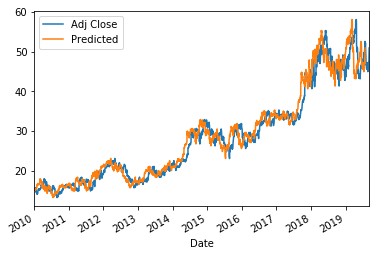

In [12]:
df.plot();

In [13]:
X=np.array(df.drop('Predicted',axis=1))
X.size

2436

In [14]:
y=np.array(df['Predicted'].dropna())
y.size

2406

In [15]:
X=X[:-n]
X.size

2406

In [16]:
X

array([[15.41090775],
       [15.40352345],
       [15.35185623],
       ...,
       [51.40294266],
       [52.56509399],
       [51.81019211]])

In [17]:
y

array([15.37050343, 15.50441647, 15.48954201, ..., 48.91999817,
       50.09999847, 50.91999817])

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) # default test_size = 0.25

In [0]:
lm=LinearRegression()
rm=Ridge()
lssm=Lasso()
svm=SVR(kernel='rbf',C=10,gamma=0.1,degree=5)
knn=KNeighborsRegressor(n_neighbors=8)
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()

In [20]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lm.score(X_test,y_test)

0.946328244311677

In [22]:
X=np.array(df.drop('Predicted',axis=1))
X.size

2436

In [0]:
df['Predicted']=lm.predict(X)

In [24]:
df.sample(10)

,Adj Close,Predicted
Date,,
2010-08-20,14.275847,14.758072
2018-06-11,52.829926,53.174954
2015-12-02,31.377846,31.799212
2016-11-07,32.282742,32.700888
2013-09-10,19.299368,19.763716
2010-04-23,17.885138,18.354518
2018-11-09,47.197308,47.562380
2011-10-25,19.232666,19.697251
2012-03-29,22.361729,22.815179


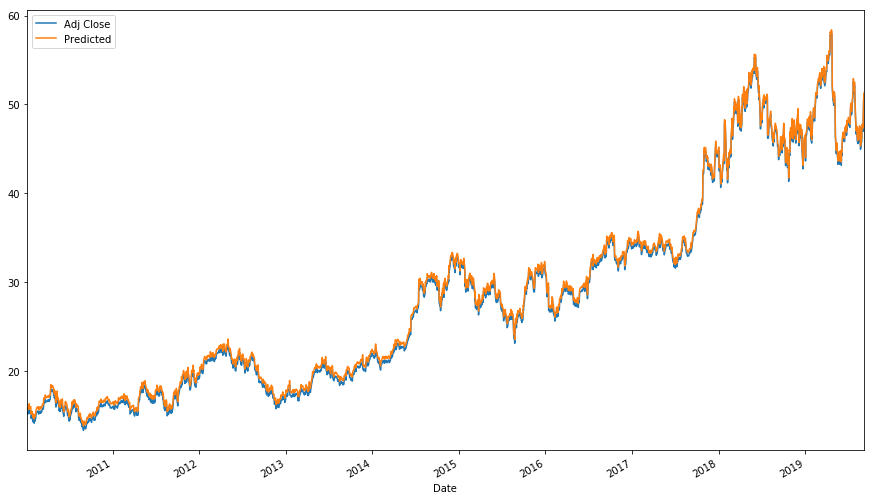

In [25]:
df.plot(figsize=(15,9));

In [26]:
rm.fit(X_train,y_train)
rm.score(X_test,y_test)

0.9463285995312998

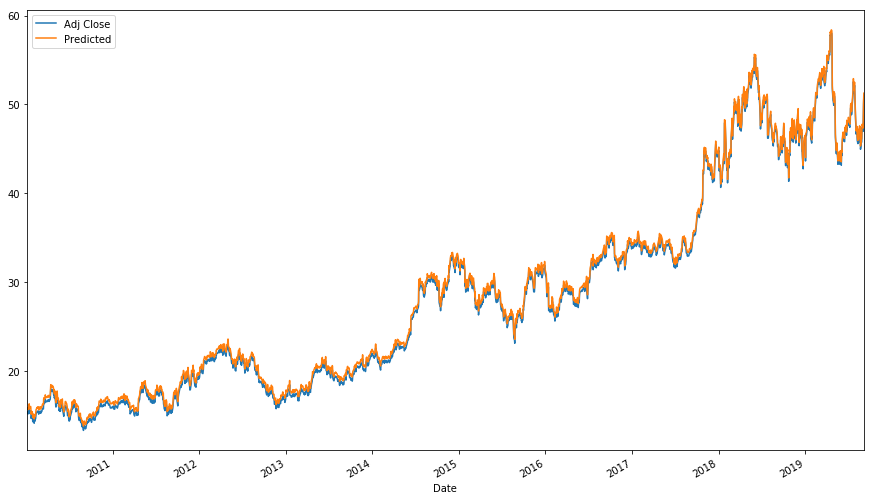

In [27]:
df['Predicted']=rm.predict(X)
df.plot(figsize=(15,9));

In [28]:
lssm.fit(X_train,y_train)
lssm.score(X_test,y_test)

0.9468564232284833

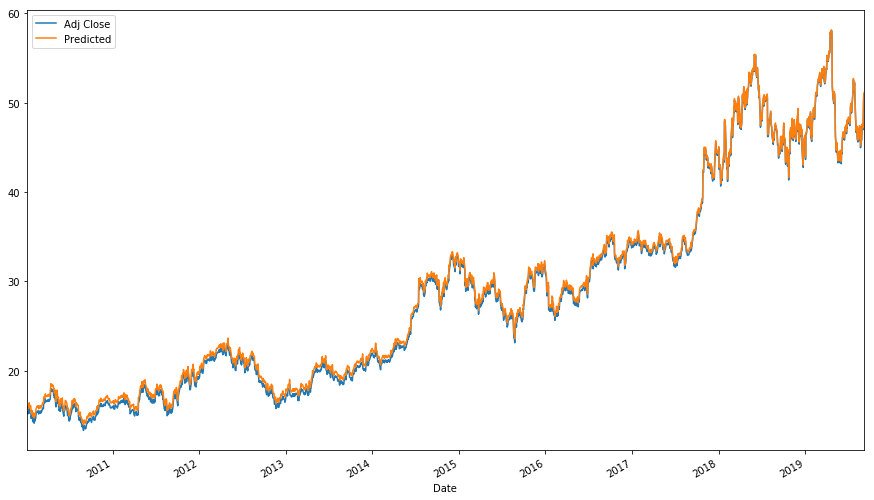

In [29]:
df['Predicted']=lssm.predict(X)
df.plot(figsize=(15,9));

In [30]:
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9656184873122479

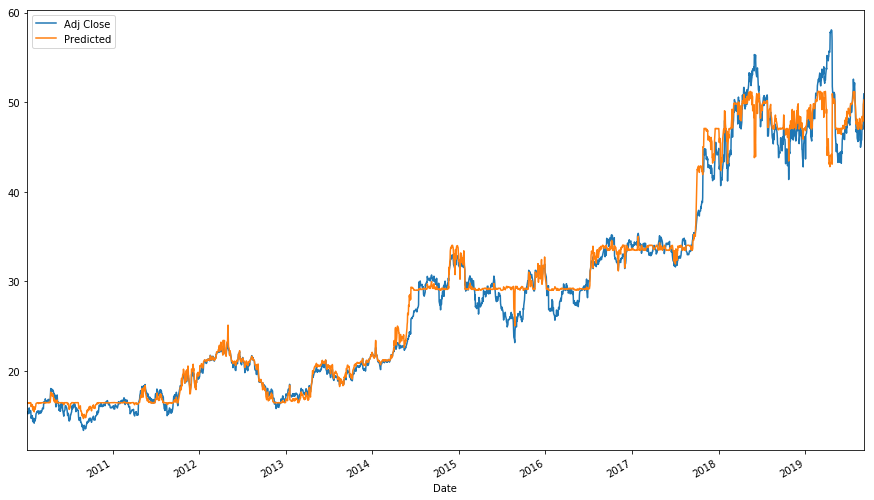

In [31]:
df['Predicted']=svm.predict(X)
df.plot(figsize=(15,9));

In [32]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.96652255948258

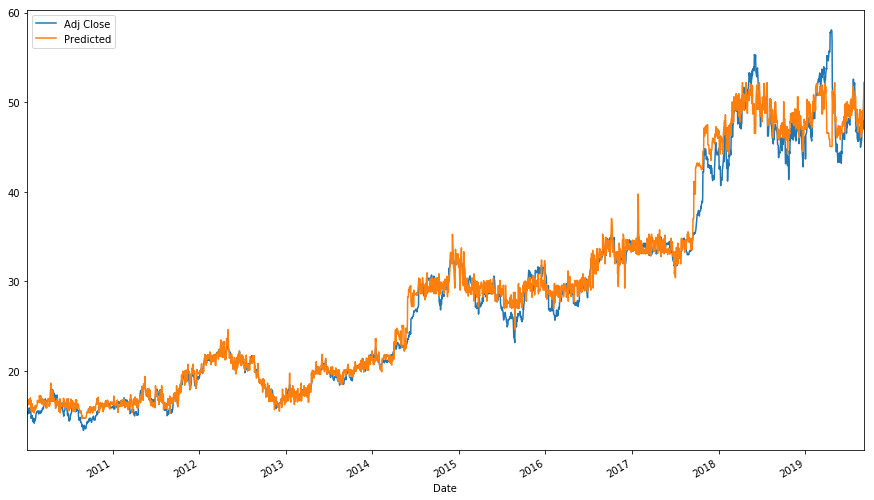

In [33]:
df['Predicted']=knn.predict(X)
df.plot(figsize=(15,9));

In [34]:
gbr.fit(X_train,y_train)
gbr.score(X_test,y_test)

0.9666172988728386

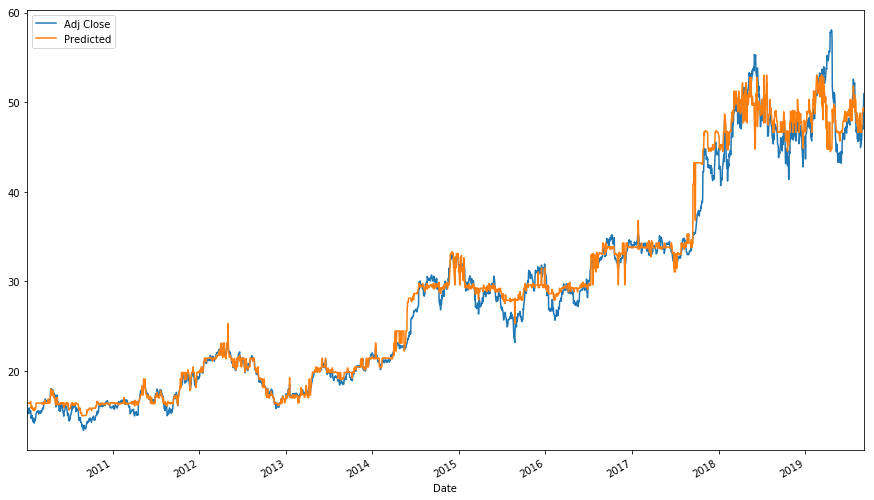

In [35]:
df['Predicted']=gbr.predict(X)
df.plot(figsize=(15,9));

In [39]:
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.9540167547373263

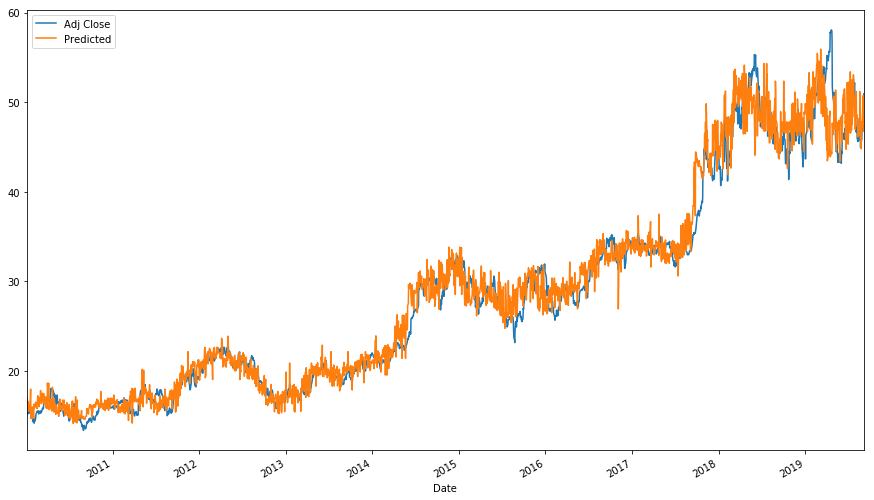

In [40]:
df['Predicted']=rfr.predict(X)
df.plot(figsize=(15,9));